In [314]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def first_nonzero(arr, axis=0, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

def detect_miss_rate_at_1FApH(false_rates, miss_rates, thresholds):
    index = 0
    while True:
        if false_rates[index]>1:
            return miss_rates[index-1], false_rates[index-1], thresholds[index-1]
        index += 1
    

feat_address = 'wav2vec2_features'
classes = os.listdir(feat_address)


In [315]:
classes

['hey_snapdragon',
 'hi_galaxy',
 'hey_siri',
 'hey_android',
 'hi_lumina',
 'background']

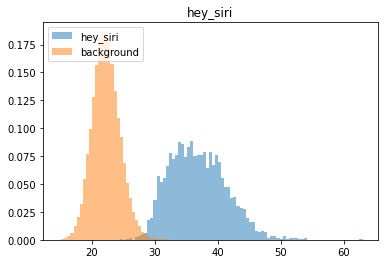

Calculating ROC


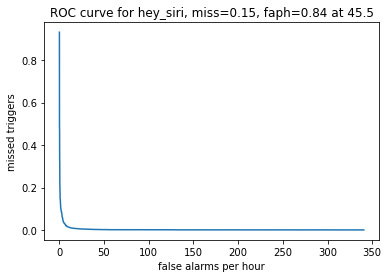

In [312]:
keyword = classes[2]

bck_filenames = os.listdir(os.path.join(feat_address, 'background'))
feat_size = 1024
filenames = os.listdir(os.path.join(feat_address, keyword))
train_filenames = [x for x in filenames if not x.startswith('test')]
num_train = len(train_filenames)
test_filenames = list(set(filenames) - set(train_filenames))
train_samples = np.zeros((feat_size, num_train))
for i in range(num_train):
    train_samples[:, i] = np.squeeze(np.load(os.path.join(feat_address, keyword, train_filenames[i]))) 
friends = np.zeros((len(test_filenames),))
foes = np.zeros((len(bck_filenames),))
for inx in range(len(test_filenames)):
    friend = np.squeeze(np.load(os.path.join(feat_address, keyword, test_filenames[inx]))) 
    friends[inx] = np.matmul(friend, train_samples).max()
for inx in range(len(bck_filenames)):
    foe = np.squeeze(np.load(os.path.join(feat_address, 'background', bck_filenames[inx]))) 
    foes[inx] = np.matmul(foe, train_samples).max()
beg = min((min(friends), min(foes)))
end = max((max(friends), max(foes)))
bins = np.linspace(beg, end, 100)
plt.hist(friends, bins, alpha=0.5, density=True,label=keyword)
plt.legend(loc='upper left')
plt.hist(foes, bins, alpha=0.5, density=True, label='background')
plt.legend(loc='upper left')
plt.title(f'{keyword}')
plt.show()
roc_bins = np.linspace(beg, end, 1000)
miss_rate = np.zeros_like(roc_bins)
false_rate = np.zeros_like(roc_bins)
print('Calculating ROC')
num_bins = 1000
test_duration_in_hours = 10.7 #It is in fact 10.7 hours
for i in range(num_bins):
    th = roc_bins[i]
    miss_rate[i] = sum(friends<th)/len(friends)
    false_rate[i] = sum(foes>th)/test_duration_in_hours

false_rate_reversed = false_rate[::-1] 
miss_rate_reversed = miss_rate[::-1]
inx = first_nonzero(false_rate_reversed)
inx2 = num_bins - first_nonzero(miss_rate)
miss, faph, th = detect_miss_rate_at_1FApH(false_rate_reversed, miss_rate_reversed, roc_bins)
plt.plot(false_rate_reversed[inx:inx2], miss_rate_reversed[inx:inx2]) 
plt.title(f'ROC curve for {keyword}, miss={miss:.2f}, faph={faph:.2f} at {th:.1f}')
plt.xlabel("false alarms per hour")
plt.ylabel("missed triggers")
plt.show()



hey_snapdragon


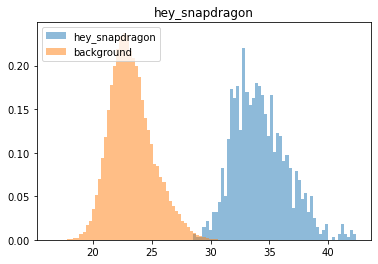

Calculating ROC


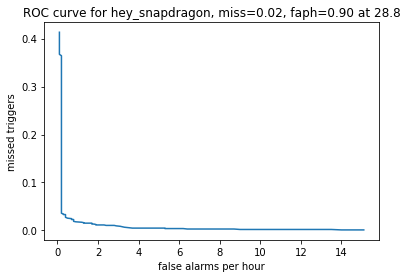

hi_galaxy


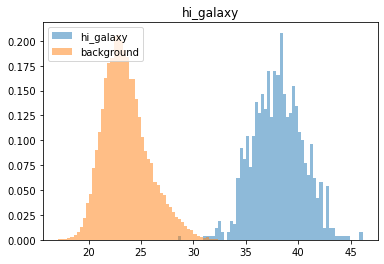

Calculating ROC


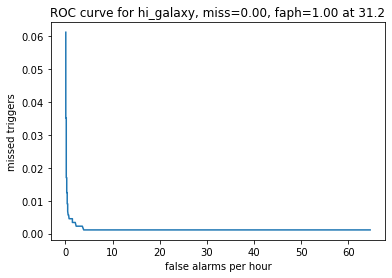

hey_siri


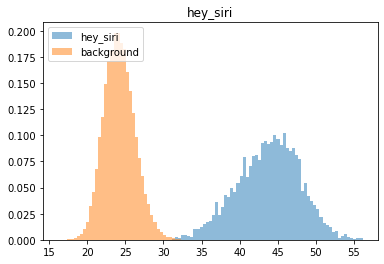

Calculating ROC


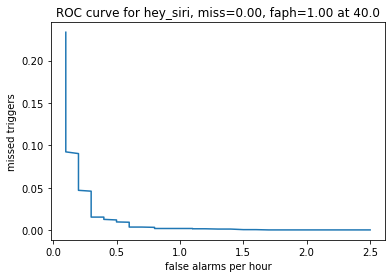

hey_android


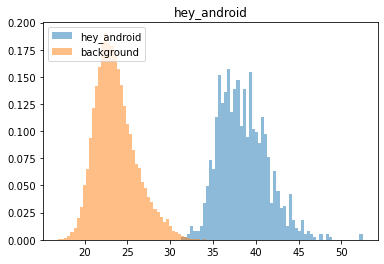

Calculating ROC


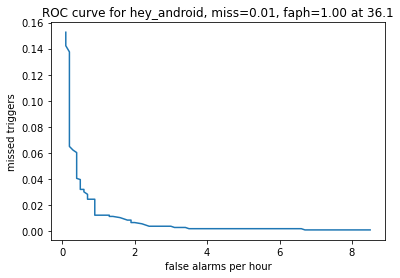

hi_lumina


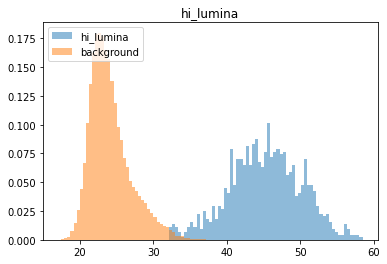

Calculating ROC


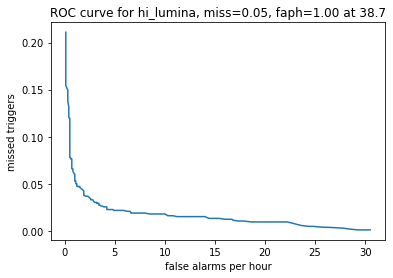

In [313]:

bck_filenames = os.listdir(os.path.join(feat_address, 'background'))
num_train = 50
feat_size = 1024
for keyword in classes[:-1]:
    print(keyword)
    filenames = os.listdir(os.path.join(feat_address, keyword))
    train_filenames = random.sample(filenames, num_train)
    test_filenames = list(set(filenames) - set(train_filenames))
    train_samples = np.zeros((feat_size, num_train))
    for i in range(num_train):
        train_samples[:, i] = np.squeeze(np.load(os.path.join(feat_address, keyword, train_filenames[i]))) 
    friends = np.zeros((len(test_filenames),))
    foes = np.zeros((len(bck_filenames),))
    for inx in range(len(test_filenames)):
        friend = np.squeeze(np.load(os.path.join(feat_address, keyword, test_filenames[inx]))) 
        friends[inx] = np.matmul(friend, train_samples).max()
    for inx in range(len(bck_filenames)):
        foe = np.squeeze(np.load(os.path.join(feat_address, 'background', bck_filenames[inx]))) 
        foes[inx] = np.matmul(foe, train_samples).max()
    beg = min((min(friends), min(foes)))
    end = max((max(friends), max(foes)))
    bins = np.linspace(beg, end, 100)
    plt.hist(friends, bins, alpha=0.5, density=True,label=keyword)
    plt.legend(loc='upper left')
    plt.hist(foes, bins, alpha=0.5, density=True, label='background')
    plt.legend(loc='upper left')
    plt.title(f'{keyword}')
    plt.show()
    roc_bins = np.linspace(beg, end, 1000)
    miss_rate = np.zeros_like(roc_bins)
    false_rate = np.zeros_like(roc_bins)
    print('Calculating ROC')
    num_bins = 1000
    test_duration_in_hours = 10 #It is in fact 10.7 hours
    for i in range(num_bins):
        th = roc_bins[i]
        miss_rate[i] = sum(friends<th)/len(friends)
        false_rate[i] = sum(foes>th)/test_duration_in_hours
        
    false_rate_reversed = false_rate[::-1] 
    miss_rate_reversed = miss_rate[::-1]
    inx = first_nonzero(false_rate_reversed)
    inx2 = num_bins - first_nonzero(miss_rate)
    miss, faph, th = detect_miss_rate_at_1FApH(false_rate_reversed, miss_rate_reversed, roc_bins)
    plt.plot(false_rate_reversed[inx:inx2], miss_rate_reversed[inx:inx2]) 
    plt.title(f'ROC curve for {keyword}, miss={miss:.2f}, faph={faph:.2f} at {th:.1f}')
    plt.xlabel("false alarms per hour")
    plt.ylabel("missed triggers")
    plt.show()
